removed

### **Reification:rdfstar , Scale:10M,100M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1Bfv-AmDf-WPUbbys_oJN6GCJhKeP2Xwz
To: /content/rdfstarGDBgraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 23.8MB/s]


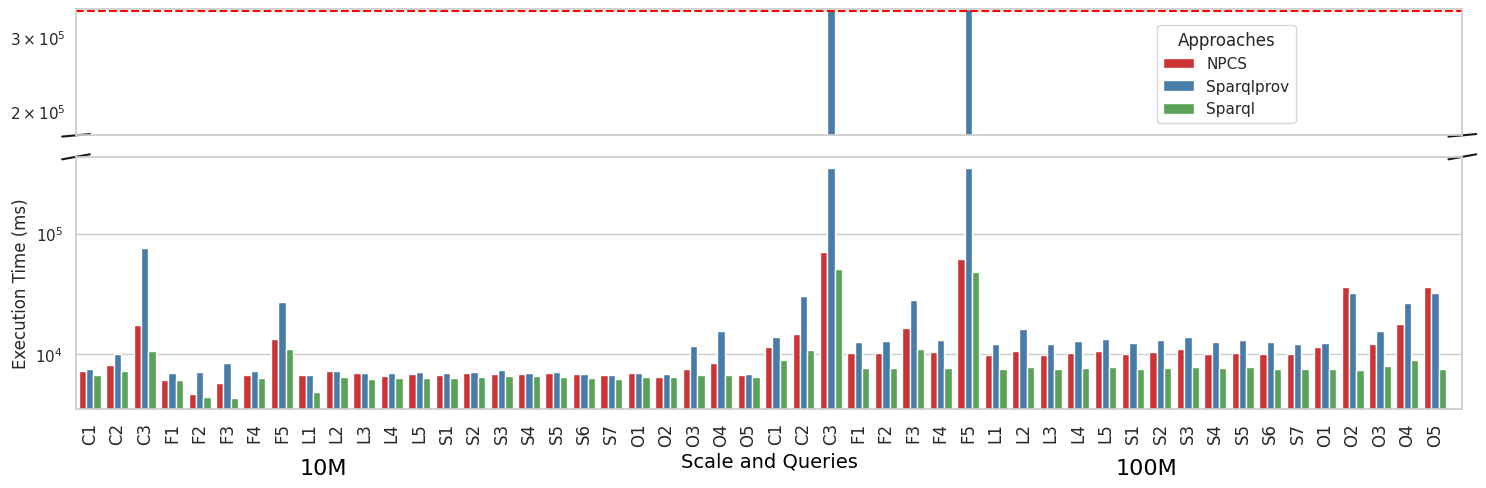

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1Bfv-AmDf-WPUbbys_oJN6GCJhKeP2Xwz/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true

file_id ='1Bfv-AmDf-WPUbbys_oJN6GCJhKeP2Xwz'
# Define the output file name
output_file = 'rdfstarGDBgraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    # Create the DataFrame
    # df = pd.DataFrame(penguins)
     #file_path = "rdfstarGDBgraph.xlsx"  # Replace with the actual path to your file
     #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 1000, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 1000, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:rdfstar , Scale:10M,100M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=1BlD60WBTkF5Ao4ppL_O_VyUpnVeycSxk
To: /content/rdfstarStardoggraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 21.8MB/s]


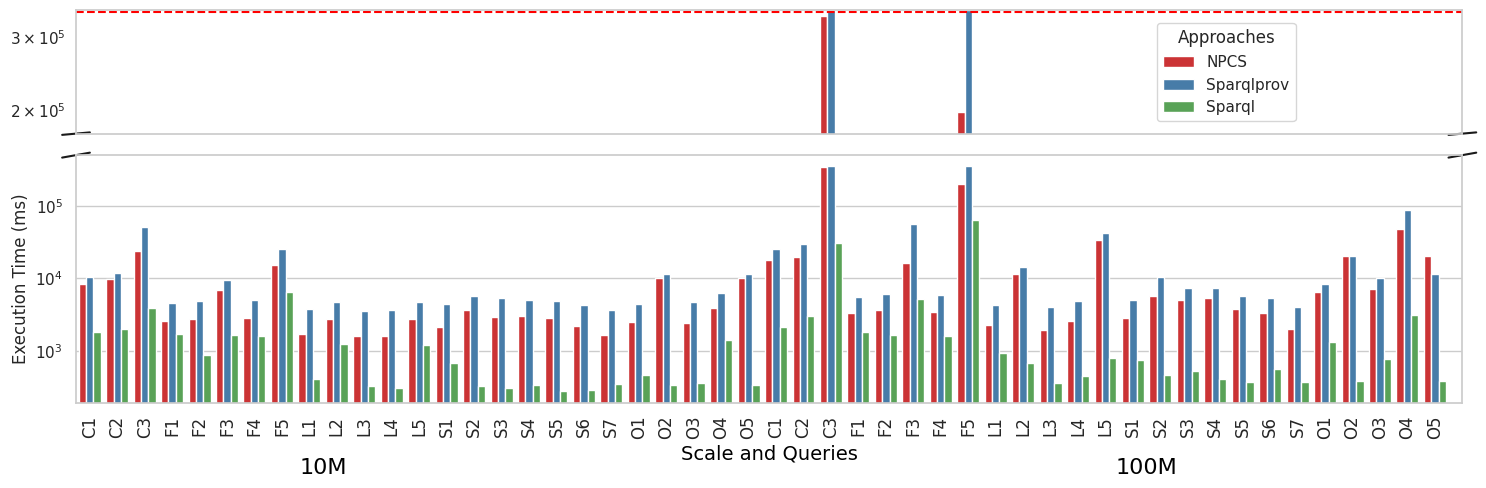

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1BlD60WBTkF5Ao4ppL_O_VyUpnVeycSxk/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true

file_id ='1BlD60WBTkF5Ao4ppL_O_VyUpnVeycSxk'
# Define the output file name
output_file = 'rdfstarStardoggraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    # Create the DataFrame
    # df = pd.DataFrame(penguins)
     #file_path = "rdfstarGDBgraph.xlsx"  # Replace with the actual path to your file
     #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 20, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 20, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    #for i in range(1, len(xtick_labels) + 1):
     #   ax2.axhline(y=10, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)
     # for i in range(1, len(xtick_labels) + 1):
        #  ax2.axhline(loc(2,500), xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)
    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:rdfstar , Scale:200M  , Engine:Graphdb**

Downloading...
From: https://drive.google.com/uc?id=1IV19Vza_fLStsR9Li5mqLFZlkSoNiu3g
To: /content/rdfstar200graph.xlsx
100%|██████████| 9.47k/9.47k [00:00<00:00, 6.23MB/s]
<ipython-input-20-008231555291>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


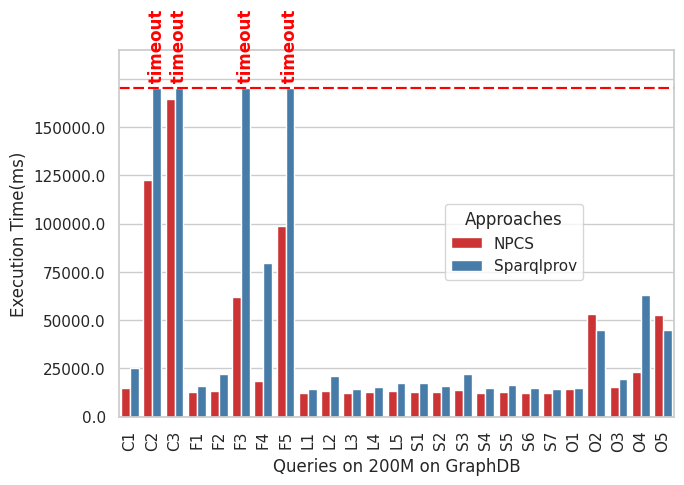

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1BlD60WBTkF5Ao4ppL_O_VyUpnVeycSxk/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
# https://docs.google.com/spreadsheets/d/1IV19Vza_fLStsR9Li5mqLFZlkSoNiu3g/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1IV19Vza_fLStsR9Li5mqLFZlkSoNiu3g'
# Define the output file name
output_file = 'rdfstar200graph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    #file_path = "rdfstarStardoggraph.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 170000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 170000  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick <= timeout else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on GraphDB")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:rdfstar , Scale:200M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=14fVbtCUE-ywZ_LP5pIvGwcawujq0Ew4h
To: /content/rdfstarStardog200.xlsx
100%|██████████| 9.54k/9.54k [00:00<00:00, 14.3MB/s]
<ipython-input-26-7afa20fb7ecf>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


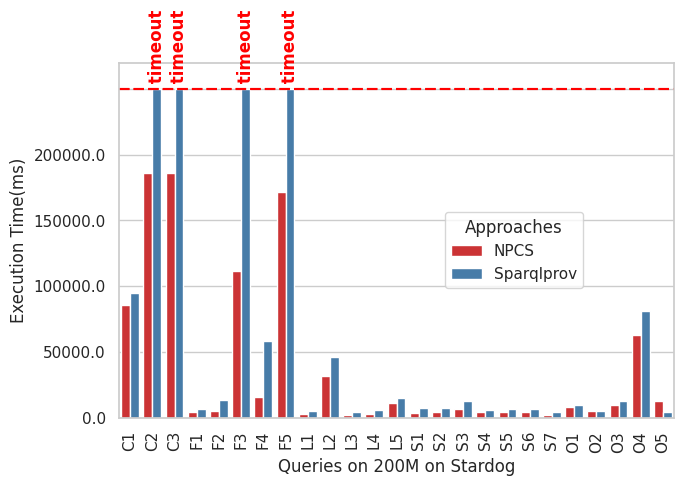

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1BlD60WBTkF5Ao4ppL_O_VyUpnVeycSxk/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
# https://docs.google.com/spreadsheets/d/1IV19Vza_fLStsR9Li5mqLFZlkSoNiu3g/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
#https://docs.google.com/spreadsheets/d/14fVbtCUE-ywZ_LP5pIvGwcawujq0Ew4h/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='14fVbtCUE-ywZ_LP5pIvGwcawujq0Ew4h'
# Define the output file name
output_file = 'rdfstarStardog200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    #file_path = "rdfstarStardoggraph.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 249999  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 249999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick <= timeout else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on Stardog")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:namedgraph , Scale:10M,100M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1Qm9UGzm5OFuvNUNjMLrJ1BfYj-pKeHC1
To: /content/namedgraphGDBgraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 7.22MB/s]


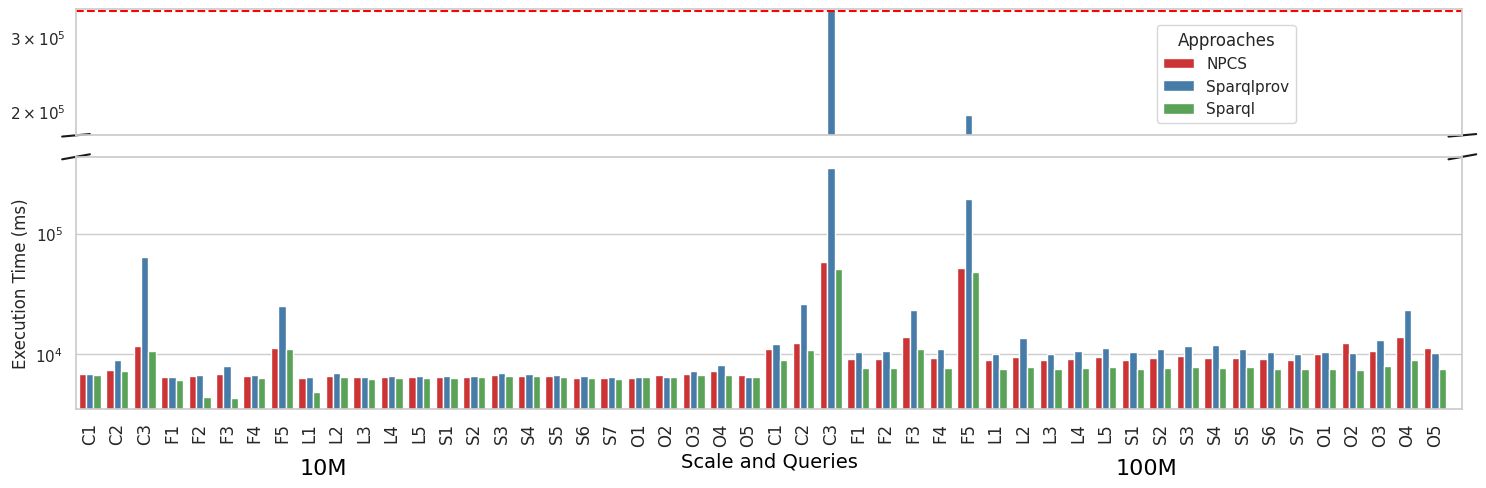

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1Qm9UGzm5OFuvNUNjMLrJ1BfYj-pKeHC1/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true

file_id ='1Qm9UGzm5OFuvNUNjMLrJ1BfYj-pKeHC1'
# Define the output file name
output_file = 'namedgraphGDBgraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    #file_path = "namedgraphGDBgraph.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 1000, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 1000, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()




except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:namedgraph , Scale:10M,100M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=19_aFOjn66QBvz9ZnXLBv6ARRkbD6E3o3
To: /content/namedgraphStardoggraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 18.6MB/s]


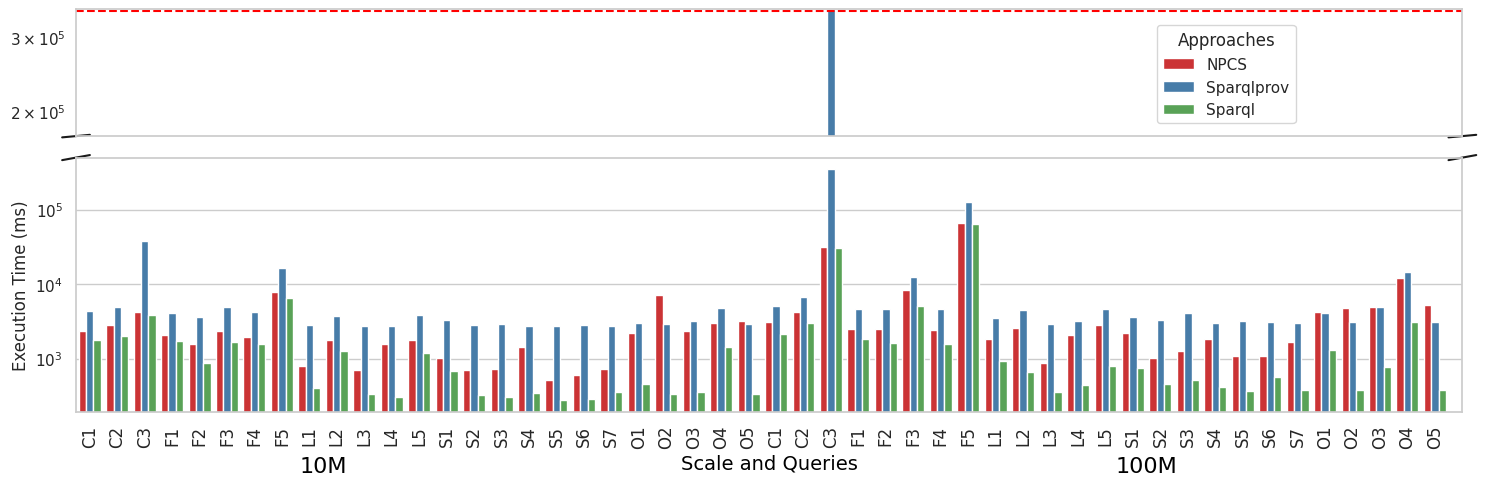

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/19_aFOjn66QBvz9ZnXLBv6ARRkbD6E3o3/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='19_aFOjn66QBvz9ZnXLBv6ARRkbD6E3o3'
# Define the output file name
output_file = 'namedgraphStardoggraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    #file_path = "namedgraphStardoggraph.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 30, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 30, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:namedgraph , Scale:200M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1Gg9GPjlF2lulmVint0gzobApmVEKYSbM
To: /content/namedgraphGDB200.xlsx
100%|██████████| 9.44k/9.44k [00:00<00:00, 8.62MB/s]
<ipython-input-16-8050beb132f5>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


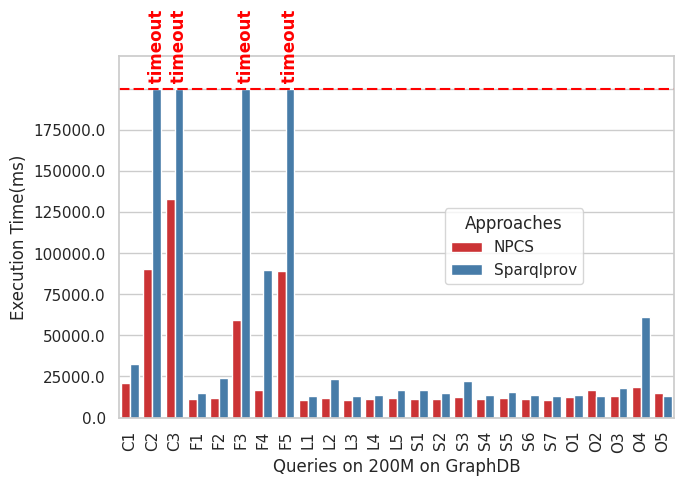

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#https://docs.google.com/spreadsheets/d/1Gg9GPjlF2lulmVint0gzobApmVEKYSbM/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1Gg9GPjlF2lulmVint0gzobApmVEKYSbM'
# Define the output file name
output_file = 'namedgraphGDB200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    #file_path = "namedgraphGDB200.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on GraphDB")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:namedgraph , Scale:200M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=1StVh9FB4aPJGeUWr5rsrvKwBs_h3jqsL
To: /content/namedgraphStardog200.xlsx
100%|██████████| 9.41k/9.41k [00:00<00:00, 17.4MB/s]
<ipython-input-17-827bdb2e486e>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


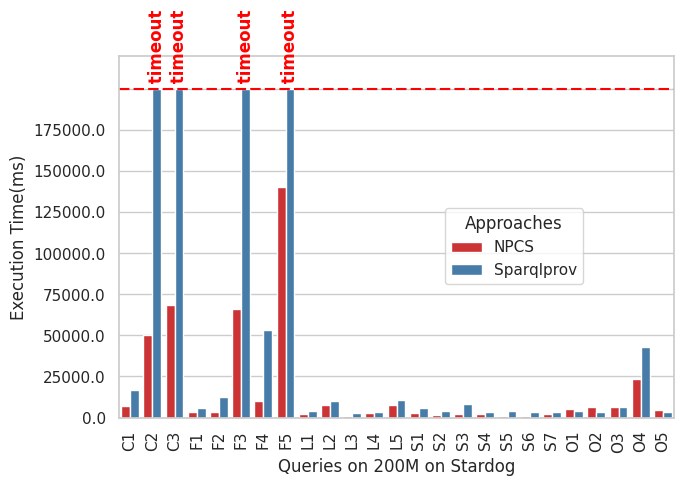

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1StVh9FB4aPJGeUWr5rsrvKwBs_h3jqsL/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1StVh9FB4aPJGeUWr5rsrvKwBs_h3jqsL'
# Define the output file name
output_file = 'namedgraphStardog200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
   # file_path = "namedgraphStardog200.xlsx"  # Replace with the actual path to your file
   # penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on Stardog")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:wikidata , Scale:10M,100M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=19qCuNMaRyvB0wFcRYzKf1nPenZL5636I
To: /content/wikidataGDBgraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 5.88MB/s]


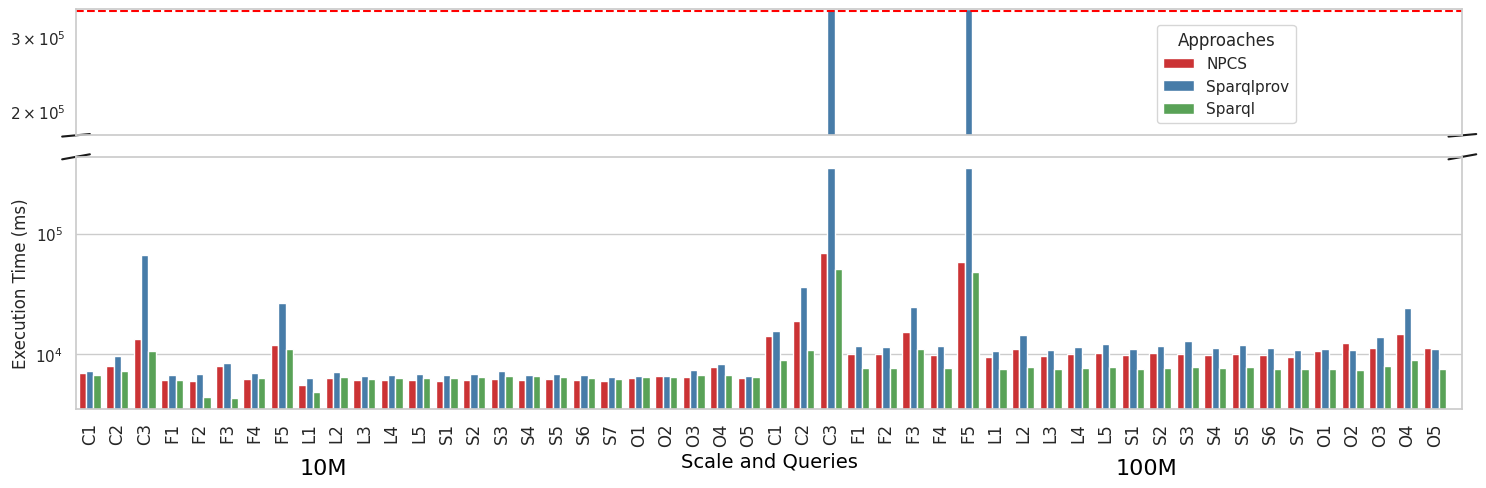

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/19qCuNMaRyvB0wFcRYzKf1nPenZL5636I/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='19qCuNMaRyvB0wFcRYzKf1nPenZL5636I'
# Define the output file name
output_file = 'wikidataGDBgraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    #file_path = "wikidataGDBgraph.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 1000, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 1000, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:wikidata , Scale:10M,100M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=1edx5kaU0MpI0A57KXT28elsF21czTv3u
To: /content/wikidataStardoggraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 22.4MB/s]


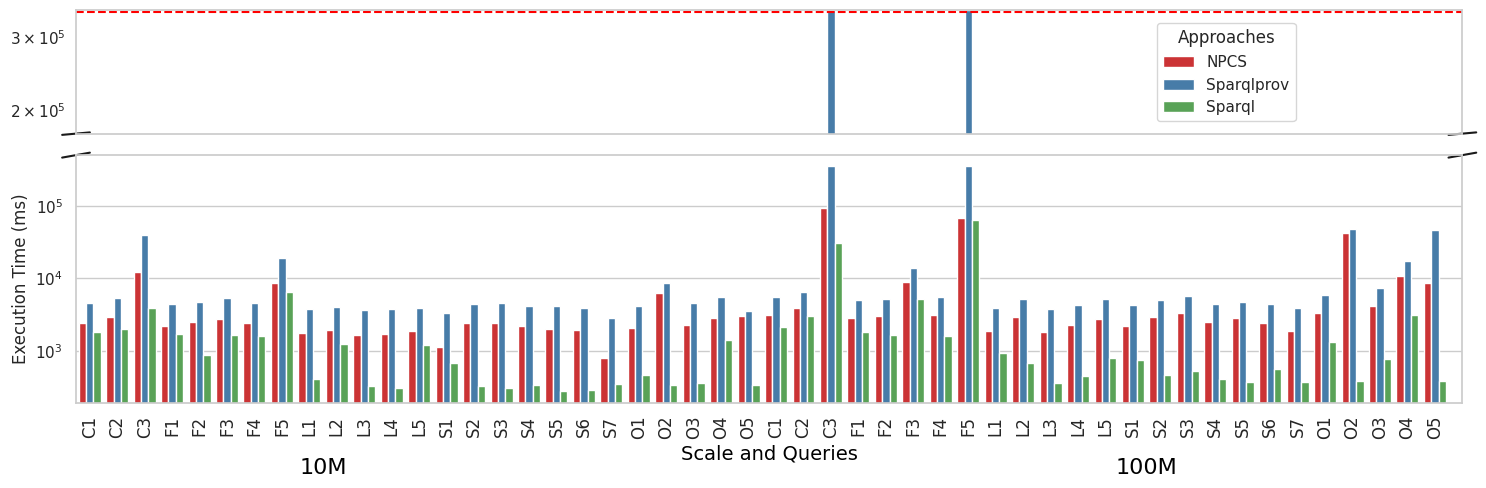

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1edx5kaU0MpI0A57KXT28elsF21czTv3u/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1edx5kaU0MpI0A57KXT28elsF21czTv3u'
# Define the output file name
output_file = 'wikidataStardoggraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
   # file_path = "wikidataStardoggraph.xlsx"  # Replace with the actual path to your file
   # penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 20, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 20, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:wikidata , Scale:200M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1wZ5g1blR-UyA8IaQyt4nuabEKbQhfuR_
To: /content/wikidataGDB200.xlsx
100%|██████████| 9.44k/9.44k [00:00<00:00, 19.5MB/s]
<ipython-input-2-68c760cc8738>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


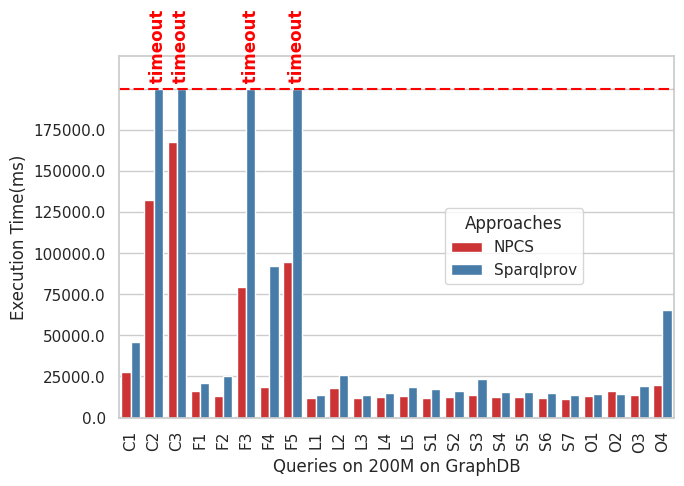

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1wZ5g1blR-UyA8IaQyt4nuabEKbQhfuR_/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1wZ5g1blR-UyA8IaQyt4nuabEKbQhfuR_'
# Define the output file name
output_file = 'wikidataGDB200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    # file_path = "wikidataGDB200.xlsx"  # Replace with the actual path to your file
    # penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on GraphDB")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:wikidata , Scale:200M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=1nbM99sNf4ncVXfDl-ZkRlGnMdDqz2qUq
To: /content/wikidataStardog200.xlsx
100%|██████████| 9.44k/9.44k [00:00<00:00, 16.5MB/s]
<ipython-input-4-afa133404297>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


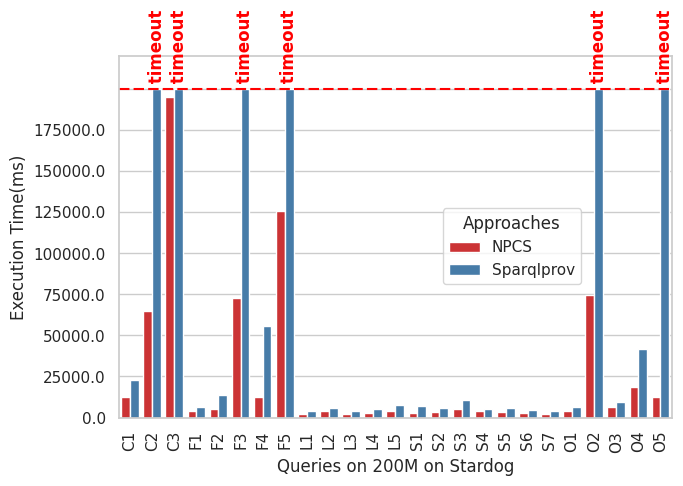

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1nbM99sNf4ncVXfDl-ZkRlGnMdDqz2qUq/edit?usp=drive_link&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1nbM99sNf4ncVXfDl-ZkRlGnMdDqz2qUq'
# Define the output file name
output_file = 'wikidataStardog200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
    #file_path = "wikidataStardog200.xlsx"  # Replace with the actual path to your file
    #penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on Stardog")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()



except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:standard , Scale:10M,100M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1oPBBdVZdvGL7RLBaqFBFiKjVCNIpJ3ly
To: /content/standardGDBgraph.xlsx
100%|██████████| 11.0k/11.0k [00:00<00:00, 7.40MB/s]


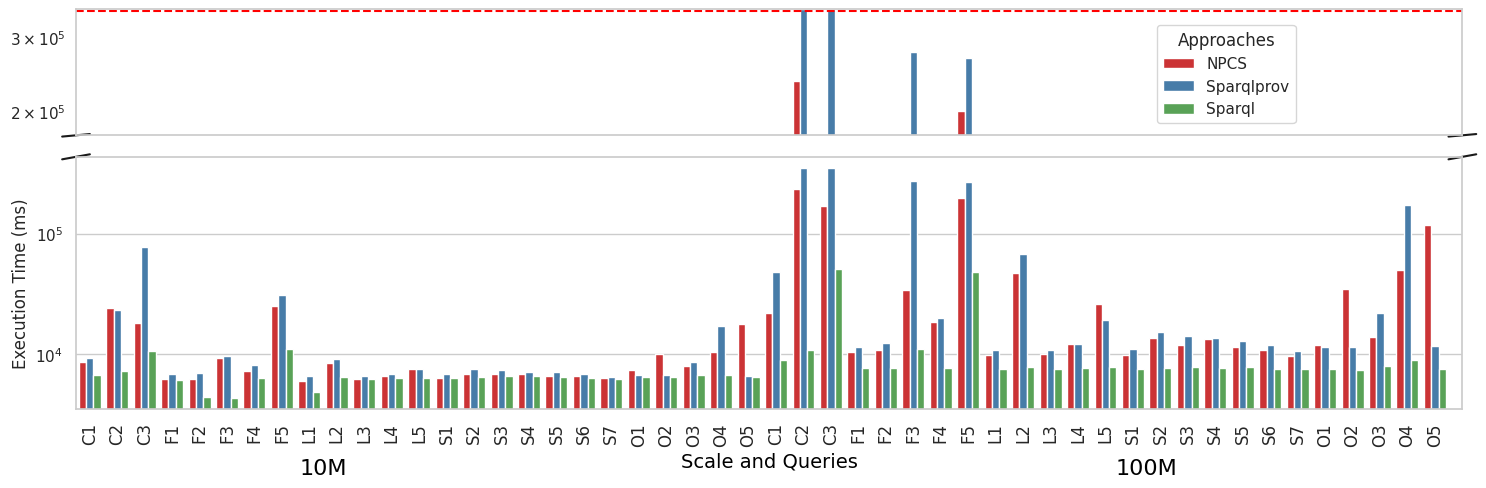

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1oPBBdVZdvGL7RLBaqFBFiKjVCNIpJ3ly/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1oPBBdVZdvGL7RLBaqFBFiKjVCNIpJ3ly'
# Define the output file name
output_file = 'standardGDBgraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')
   # file_path = "standardGDBgraph.xlsx"  # Replace with the actual path to your file
   # penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 1000, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 1000, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()




except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:standard , Scale:10M,100M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=1_QQTetTX-VPyAU7lUOkc0bkr6S7ZJcA7
To: /content/standardStardoggraph.xlsx
100%|██████████| 11.1k/11.1k [00:00<00:00, 20.3MB/s]


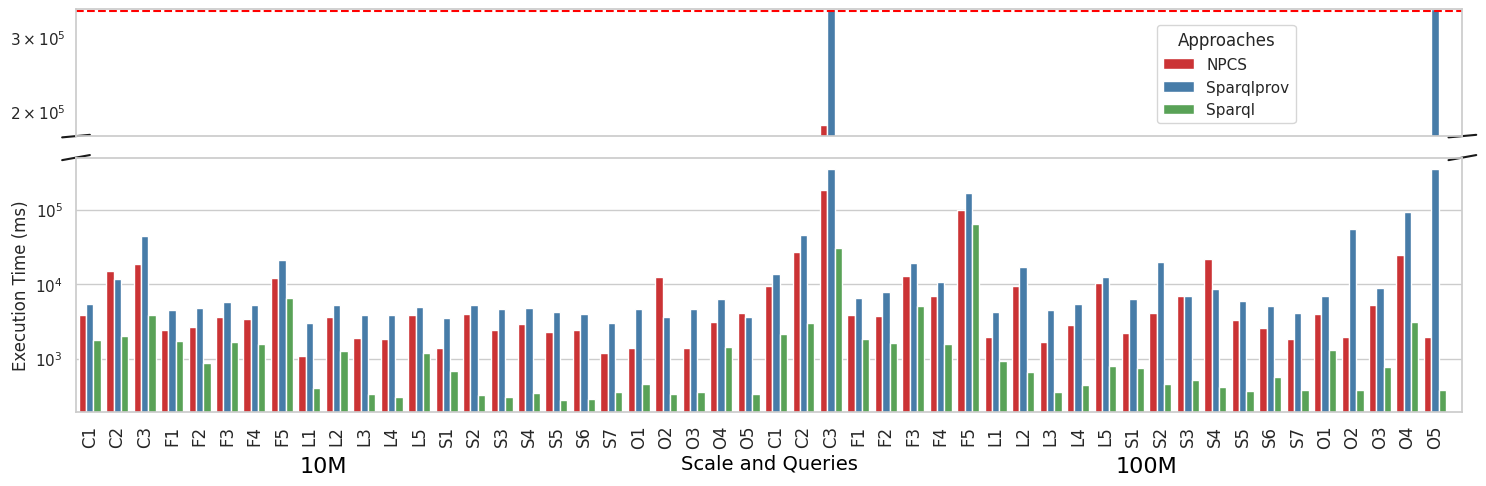

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#https://docs.google.com/spreadsheets/d/1_QQTetTX-VPyAU7lUOkc0bkr6S7ZJcA7/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1_QQTetTX-VPyAU7lUOkc0bkr6S7ZJcA7'
# Define the output file name
output_file = 'standardStardoggraph.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    file_path = "standardStardoggraph.xlsx"  # Replace with the actual path to your file
    penguins = pd.read_excel(file_path)
    threshold = 200000  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here

    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshaping the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries', 'scale'], var_name='Approaches', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a figure with two subplots, increase the size
    f, (ax1, ax2) = plt.subplots(
        ncols=1,
        nrows=2,
        sharex=True,
        figsize=(15, 5),  # Adjust figsize to control the overall size
        gridspec_kw={"height_ratios": [1, 2]}  # Height ratio for subplots
    )

    # Create barplots on both subplots with adjusted bar width
    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax1, width=0.8
    )

    sns.barplot(
        x=['{}:{}'.format(scale, query) for scale, query in zip(df_melted['scale'], df_melted['queries'])],
        y='execution_time', hue='Approaches', data=df_melted, palette="Set1", ax=ax2, width=0.8
    )

    # Set y-axis limits for the upper subplot
    ax1.set_ylim(175000, timeout)
    # Draw a horizontal red dotted line at the top border of the above subplot
    max_y_value = 345999
    ax1.axhline(y=max_y_value, color='red', linestyle='--')

    # Apply a logarithmic scale to the y-axis of the lower subplot
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Customize x-axis labels for the lower subplot
    labels = ['C{}'.format(i) for i in range(1, 4)] + ['F{}'.format(i) for i in range(1, 6)] + ['L{}'.format(i) for i in range(1, 6)] + ['S{}'.format(i) for i in range(1, 8)] + ['O{}'.format(i) for i in range(1, 6)]
    xtick_labels = labels + labels  # Repeat the labels twice

    # Set tick positions explicitly to match the number of labels and adjust padding
    ax2.set_xticks(range(len(xtick_labels)))
    ax2.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

    # Draw a horizontal line below the labels
    #ax2.axhline(y=-5000, color='black', linewidth=0.8)
    # Add "10M" below the labels the first time
    #ax2.text(14.5, -15000, '10M', ha='center', fontsize=12, color='black')
    ax2.text(8.5, 30, '10M', ha='center', fontsize=16, color='black')
    ax2.text(38.5, 30, '100M', ha='center', fontsize=16, color='black')
    # Add "100M" below the labels the second time
    #ax2.text(37.5, -15000, '100M', ha='center', fontsize=12, color='black')

    # Set x-axis limits for the lower subplot to remove space on right and left
    ax2.set_xlim(-0.5, len(xtick_labels))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax2.set_ylabel("Execution Time (ms)")
    # Create a common legend to the right
    ax1.legend(title="Approaches", loc=(0.78, 0.1))

    # Draw horizontal lines below the labels
    for i in range(1, len(xtick_labels) + 1):
        ax2.axhline(y=-50, xmin=(i - 1) / len(xtick_labels), xmax=i / len(xtick_labels), color='black', linewidth=0.8)

    # Add labels and title
    plt.xlabel("Scale and Queries", fontsize=14, color='black')
    # Add diagonal lines
    d = .01
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:standard , Scale:200M  , Engine:GraphDB**

Downloading...
From: https://drive.google.com/uc?id=1QUnM6lHOHidqltRWUCCPWbOUvNvPLVkY
To: /content/standardGDB200.xlsx
100%|██████████| 9.32k/9.32k [00:00<00:00, 18.5MB/s]
<ipython-input-31-d793114802d0>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


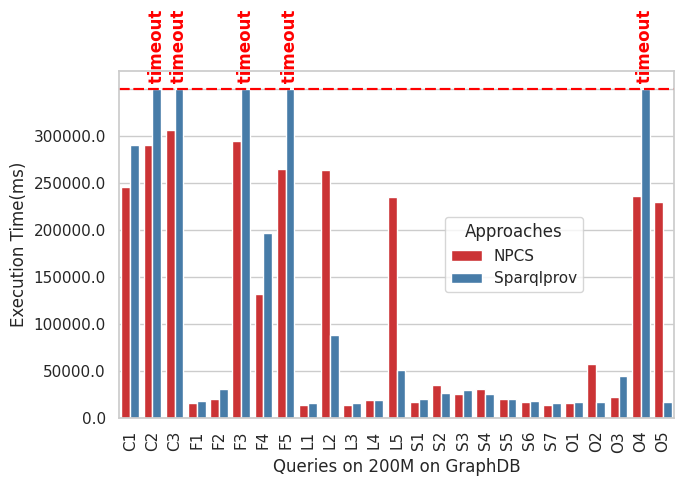

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/1QUnM6lHOHidqltRWUCCPWbOUvNvPLVkY/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='1QUnM6lHOHidqltRWUCCPWbOUvNvPLVkY'
# Define the output file name
output_file = 'standardGDB200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

    # file_path = "standardGDB200.xlsx"  # Replace with the actual path to your file
   #  penguins = pd.read_excel(file_path)
    threshold = 349999  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on GraphDB")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

### **Reification:standard , Scale:200M  , Engine:Stardog**

Downloading...
From: https://drive.google.com/uc?id=157uWLVmkc8KpGdpqsLyKp_Xcqo9V_ayX
To: /content/standardStardog200.xlsx
100%|██████████| 9.45k/9.45k [00:00<00:00, 8.55MB/s]
<ipython-input-33-ebc21fb7afbd>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks)


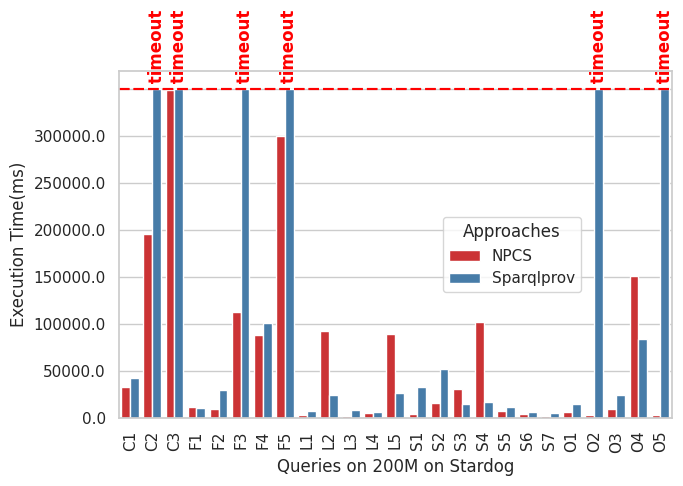

In [ ]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://docs.google.com/spreadsheets/d/157uWLVmkc8KpGdpqsLyKp_Xcqo9V_ayX/edit?usp=sharing&ouid=105848875515220509069&rtpof=true&sd=true
file_id ='157uWLVmkc8KpGdpqsLyKp_Xcqo9V_ayX'
# Define the output file name
output_file = 'standardStardog200.xlsx'  # Change the file extension as needed

# Download the file from Google Drivea
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Now that you have downloaded the file, you can read it using pandas and the appropriate engine.
# Let's assume it's in the .xlsx format and use the 'openpyxl' engine:

try:
    penguins = pd.read_excel(output_file, engine='openpyxl')

  #   file_path = "standardStardog200.xlsx"  # Replace with the actual path to your file
   #  penguins = pd.read_excel(file_path)
    threshold = 349999  # You can adjust this threshold as needed
    extra_space = 20000  # Adjust this value based on the space you want to leave for annotations
    timeout = 349999  # Set your timeout value here
    # Creating the DataFrame
    df = pd.DataFrame(penguins)

    # Reshape the DataFrame for Seaborn
    df_melted = df.melt(id_vars=['queries'], var_name='query_engine', value_name='execution_time')

    # Set the style
    sns.set(style="whitegrid")

    # Create a grouped barplot
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='queries', y='execution_time', hue='query_engine', data=df_melted, palette="Set1")

    # Set y-axis limit to the threshold + extra space
    plt.ylim(0, threshold + extra_space)

    # Limit bar heights to the threshold
    for p in ax.patches:
        if p.get_height() > threshold:
            p.set_height(threshold)
    plt.axhline(y=threshold, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Add annotations for the bars using original values
    for p, value in zip(ax.patches, df_melted['execution_time']):
        ex = ""
        if value > threshold:
            if value < timeout:
                annotation_value = min(value, timeout)
                ex = f"{annotation_value:.2f}" + "(ms)"
            else:
                ex = "timeout"

            annotation_value = min(value, timeout)

            ax.annotate(
                " " + ex,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="bottom",
                color="red",
                rotation='vertical',
                weight="bold",
            )

    # Draw the timeout line
    plt.axhline(y=timeout, color='red', linestyle=(0, (5, 2, 5, 2)))

    # Hide y-axis tick labels for values greater than the timeout
    y_ticks = ax.get_yticks()
    y_ticks = [tick if tick < threshold else '' for tick in y_ticks]
    ax.set_yticklabels(y_ticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel("Queries on 200M on Stardog")
    plt.ylabel("Execution Time(ms)")

    # Show the legend
    plt.legend(title="Approaches")
    plt.legend(title="Approaches", loc='upper right', bbox_to_anchor=(0.85, 0.60))

    # Display the plot
    plt.tight_layout()
    plt.show()


except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")